In [561]:
#####################################################################################################
# Анализ данных по ОСАГО - обязательное страхование автогражданской ответственности за 2021-2022 гг.
#####################################################################################################


#####################################################################################################
# Описание данных в датасете
#
# Таблица "test_data_insurance_edit.xlsx" - сводная таблица данных по выплатам ОСАГО
# Поля таблицы:
#    "Филиал обращения",
#    "Дата выплаты",
#    "Сумма выплаты",
#    "Процесс урегулирования",
#    "Заявление на выплату. Объект потерпевшего. Год выпуска",
#    "Категория года выпуска",
#    "Тип выплаты",
#    "Наличие заключенного Соглашения",
#    "Перестраховочный пул ОСАГО с 19.04.2022",
#    "События с 19.06.2022, на которые распространяется новая ЕМ".
#####################################################################################################

In [562]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [563]:
# Чтение файлов XLSX с данными 

df = pd.read_excel('test_data_insurance_edit.xlsx')

In [564]:
# Выводим на экран полученный датафрейм (при необходимости переименуем названия столбцов для удобства вычисления) 
# и проверим считанные типы данных

df.rename(columns = {'Филиал обращения':'region', 'Дата выплаты':'date', 'Сумма выплаты':'payment_sum', 'Процесс урегулирования':'osago_type', 'Заявление на выплату.Объект потерпевшего.Год выпуска':'car_year', 'Категория года выпуска':'year_type', 'Тип выплаты':'payment_type'}, inplace = True)
df = df.drop(['Наличие заключенного Соглашения', 'Перестраховочный пул ОСАГО с 19.04.2022', 'События с 19.06.2022, на которые распространяется новая ЕМ'], axis=1)

df.head()

,region,date,payment_sum,osago_type,car_year,year_type,payment_type
0,Абаканский филиал,2021-07-19,9300.0,ОСАГО (ПВУ),2012,Старше 2-х лет,Соглашение
1,Абаканский филиал,2021-07-19,14310.0,ОСАГО (ПВУ),2006,Старше 2-х лет,Соглашение
2,Абаканский филиал,2021-07-19,13230.0,ОСАГО (ПВУ),2002,Старше 2-х лет,Соглашение
3,Абаканский филиал,2021-07-21,29160.0,ОСАГО (ПВУ),2006,Старше 2-х лет,Соглашение
4,Абаканский филиал,2021-07-21,11700.0,ОСАГО (ПВУ),1999,Старше 2-х лет,Соглашение


In [565]:
# Типы данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77743 entries, 0 to 77742
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   region        77743 non-null  object        
 1   date          77743 non-null  datetime64[ns]
 2   payment_sum   77743 non-null  float64       
 3   osago_type    77743 non-null  object        
 4   car_year      77743 non-null  int64         
 5   year_type     77743 non-null  object        
 6   payment_type  77743 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 4.2+ MB


In [566]:
# Размеры матрицы датафрейма (количество строк и столбцов)

df.shape

(77743, 7)

In [567]:
# Выведем количество уникальных значений в каждом из столбцов нашего датафрейма

df.nunique()

region            138
date              245
payment_sum     12965
osago_type          2
car_year           52
year_type           3
payment_type        3
dtype: int64

In [568]:
# Вычислим все описательные статистики среди выплат по годам выпуска застрахованных автомобилей: count - количество элементов, 
# mean - выборочное среднее, # std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

# Также исключиим из наших данных автомобиля с годом выпуска равного "0"
df_car_year_wzero = df[df['car_year'] != 0]

df_describe_car_year = df_car_year_wzero.car_year.describe().round(0)
df_describe_car_year

count    77248.0
mean      2011.0
std          6.0
min       1964.0
25%       2008.0
50%       2012.0
75%       2017.0
max       2022.0
Name: car_year, dtype: float64

In [569]:
# Топ-5 среди выплат по годам выпуска среди застрахованных автомобилей

df_car_year_wzero.value_counts('car_year').head(5)

car_year
2012    6629
2013    5534
2008    5512
2011    5407
2007    4582
dtype: int64

In [570]:
# Из анализа по годам выпуска застрахованных автомобилей видно, что наиболее встречаемые 
# модели выпущены в "2012" году (медианное значение) 

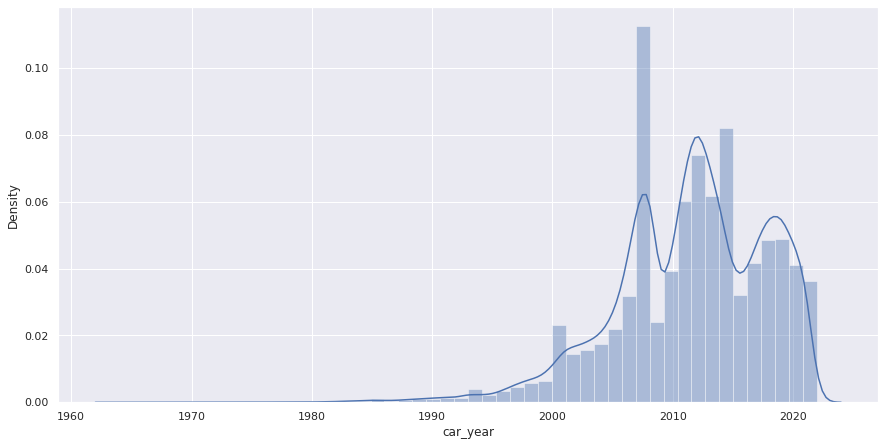

In [571]:
# Построим гистограмму распределения по годам выпуска застрахованных автомобилей

sns.set(rc={'figure.figsize':(14.7,7.27)})
sns.distplot(df_car_year_wzero.car_year);

In [572]:
# Вычислим все описательные статистики по всем суммам выплат ОСАГО: count - количество элементов, 
# mean - выборочное среднее, # std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

df_describe_payment_sum = df.payment_sum.describe().round(0)
df_describe_payment_sum

count      77743.0
mean       54264.0
std        77345.0
min            2.0
25%        14300.0
50%        28620.0
75%        62525.0
max      8422156.0
Name: payment_sum, dtype: float64

In [573]:
# Из анализа по всем суммам выплат ОСАГО видно, что средняя величина выплаты составляет "28620" рублей (медианное значение)

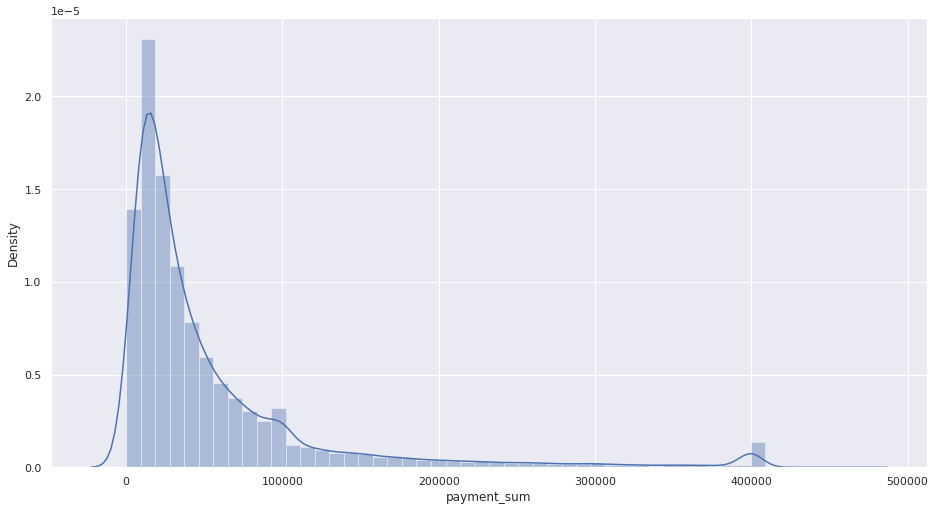

In [574]:
# Для построения гистограммы распределения выплат исключим из наших данных аномальную величину выплаты - "8422156.37"

df_describe_payment_sum_hist = df[df['payment_sum'] != 8422156.37]
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.distplot(df_describe_payment_sum_hist.payment_sum);

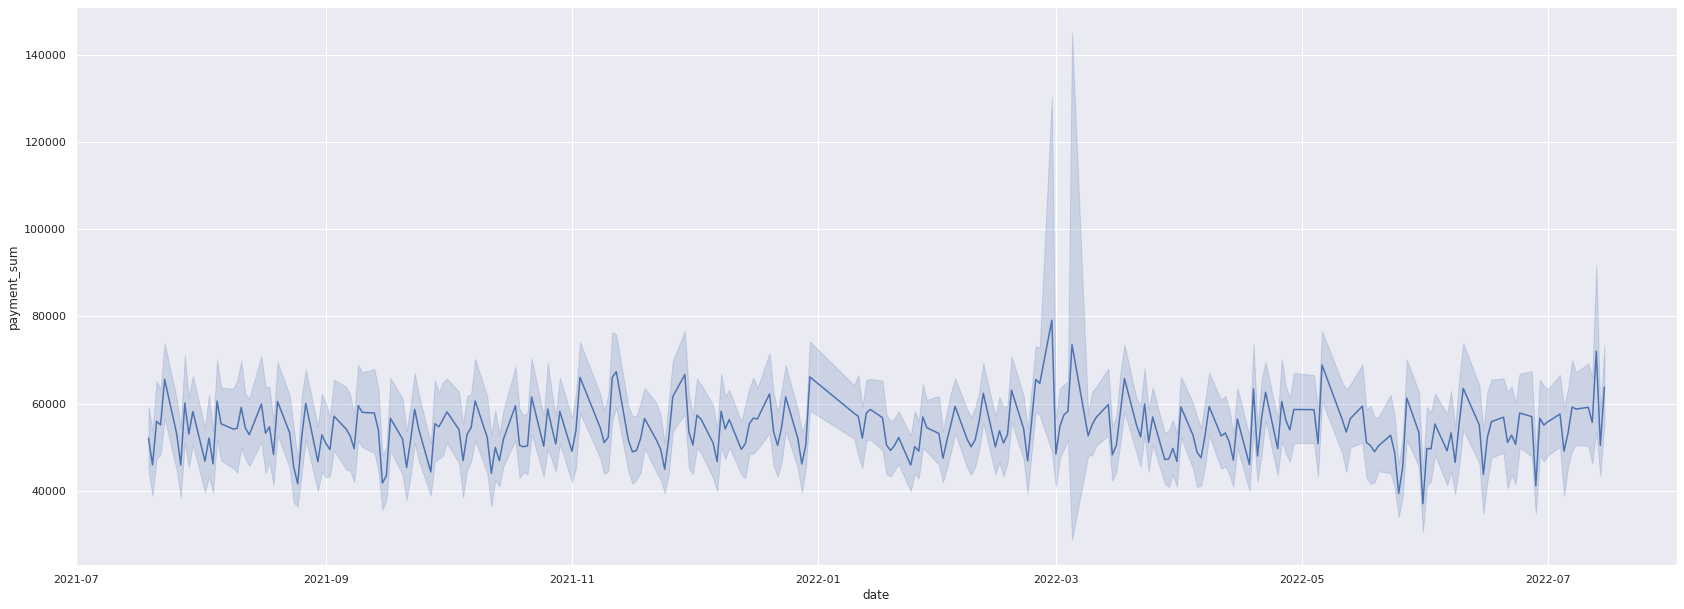

In [575]:
# Построим линейный график развития временной динамики по показателю - "Сумма выплаты" за весь период с 2021 по 2022 гг.

sns.set(rc={'figure.figsize':(28.7,10.27)})
sns.lineplot(x="date", y="payment_sum", data=df);

In [576]:
# Топ-10 наибольших сумм выплат по ОСАГО за период времени с 2021 по 2022 гг.

df.groupby(['date']).max('payment_sum').sort_values(by='payment_sum', ascending=False).head(10)

,payment_sum,car_year
date,,
2022-02-28,8422156.37,2021
2021-08-24,464550.00,2021
2022-03-23,400000.00,2021
2022-03-03,400000.00,2021
2022-03-04,400000.00,2021
2022-03-09,400000.00,2022
2022-03-10,400000.00,2022
2022-03-11,400000.00,2022
2022-03-14,400000.00,2021


In [577]:
# Суммарные показатели по суммам выплат по ОСАГО по годам (сумма, среднее, медиана, максимум, минимум)

df.groupby(df['date'].dt.year)['payment_sum'].agg(['sum', 'mean', 'median', 'max', 'min']).round(0)

,sum,mean,median,max,min
date,,,,,
2021,1.853671e+09,54011.0,28900.0,464550.0,10.0
2022,2.364969e+09,54464.0,28500.0,8422156.0,2.0


In [578]:
# Суммарные показатели с разбивкой по месяцам по суммам выплат по ОСАГО (сумма, среднее, медиана, максимум, минимум)

df.resample(rule='M', on='date')['payment_sum'].agg(['sum', 'mean', 'median', 'max', 'min']).round(0)

,sum,mean,median,max,min
date,,,,,
2021-07-31,154419542.0,54934.0,29000.0,400000.0,100.0
2021-08-31,296878066.0,53118.0,28500.0,464550.0,10.0
2021-09-30,330037468.0,52772.0,28000.0,400000.0,100.0
2021-10-31,335053333.0,53463.0,28800.0,400000.0,103.0
2021-11-30,341073221.0,55387.0,29370.0,400000.0,100.0
2021-12-31,396209366.0,54717.0,29315.0,400000.0,300.0
2022-01-31,326649874.0,53470.0,30000.0,400000.0,150.0
2022-02-28,422982455.0,56496.0,30200.0,8422156.0,400.0
2022-03-31,445825458.0,54217.0,29300.0,400000.0,2.0


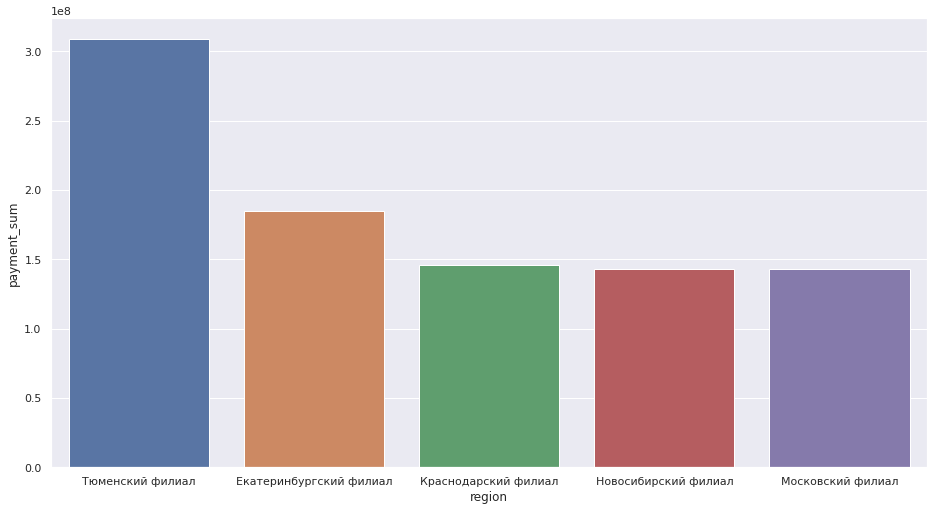

In [579]:
# Диаграмма распределения самых наибольших сумм выплат по ОСАГО по ТОП-5 регионам 

top_5_region_by_sum = df.groupby(['region']).sum().sort_values(by='payment_sum', ascending=False).head(5).reset_index()
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x="region", y="payment_sum", data=top_5_region_by_sum);

In [580]:
# ТОП-10 регионов с наибольшими суммами выплат по ОСАГО 

top_10_region_by_sum = df.groupby(['region']).sum().sort_values(by='payment_sum', ascending=False).head(10)
top_10_region_by_sum.drop(['car_year'], axis=1)

,payment_sum
region,
Тюменский филиал,3.086487e+08
Екатеринбургский филиал,1.847084e+08
Краснодарский филиал,1.458833e+08
Новосибирский филиал,1.427842e+08
Московский филиал,1.427229e+08
Якутский филиал,1.375410e+08
Сургутский филиал,1.231946e+08
Кировский филиал,1.174949e+08
Нижегородский филиал,1.104463e+08


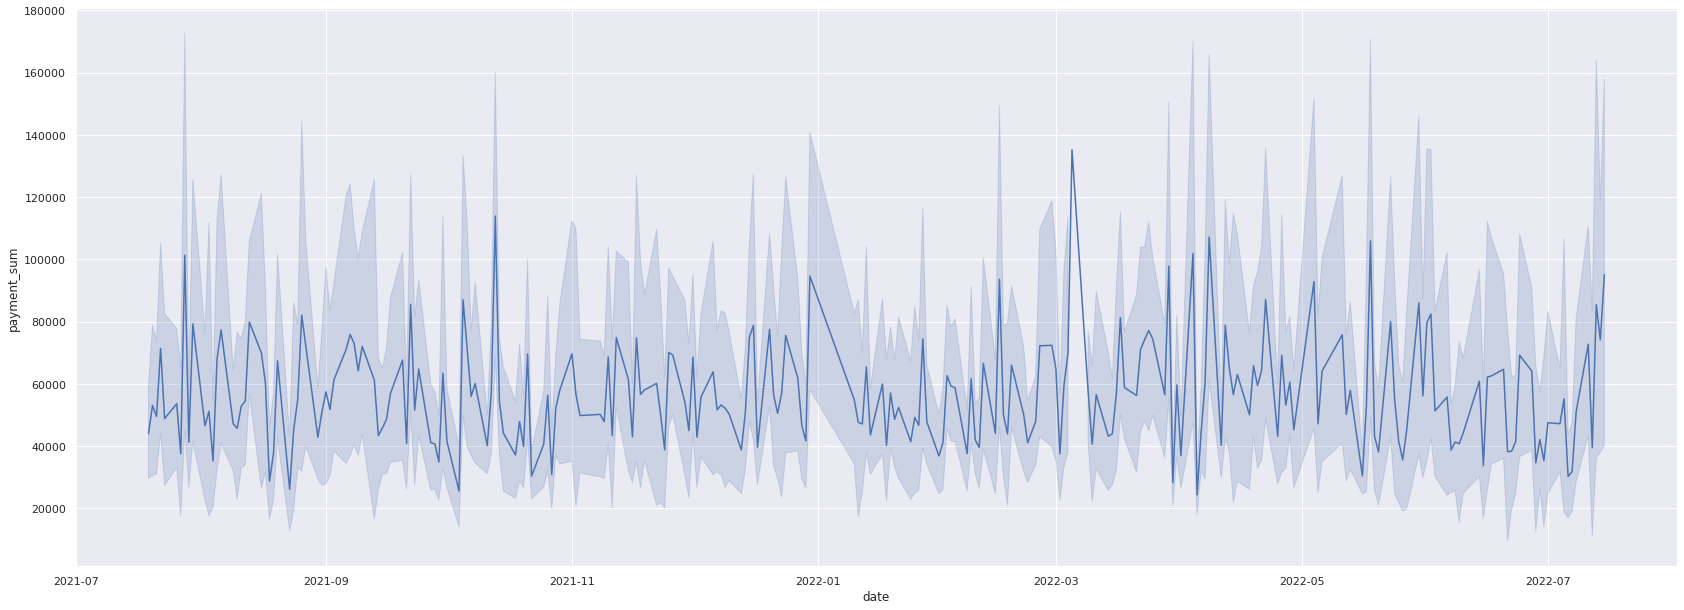

In [582]:
# Построим линейный график развития временной динамики по показателю - "Сумма выплаты" за весь период с 2021 по 2022 гг.
# для региона - "Тюменский филиал"

sns.set(rc={'figure.figsize':(28.7,10.27)})
sns.lineplot(x="date", y="payment_sum", data=df.query('region == "Тюменский филиал"'));